Minimum value= -1.9999999999999973


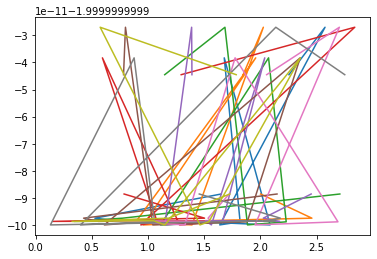

In [33]:
#LJ Assignment
#Code: Rosalie Chaleunsouck

#importing notebooks
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time

#defining function
#WHERE E=SIGMA=1
#N=3
def LJ(r):
    r6= r**6
    r12= r6*r6
    return 4*(1/r12 - 1/r6)

#defining time parameters
time1= time.time()
time2= time.time()
deltat= time2-time1

#using the scipy method of minimization
def position (N, n=3):
    return n*np.random.random_sample((N*3,))

def Total_Energy(x): #total energy calculation
    E=0
    N_atoms= int(len(x)/3)
    
    for i in range(N_atoms-1):
        for j in range (i+1, N_atoms):
            x1 = [x[i*3], x[i*3+1], x[i*3+2]]
            x2= [x[j*3], x[j*3+1], x[j*3+2]]
            
            distance= np.sqrt((x1[0]-x2[0])**2+ (x1[1]-x2[1])**2+ (x1[2]-x2[2])**2)
            
            E+= LJ(distance)
            
        return E

#defining arrays to store randomly generated data
x = []
f = []
N = 10
N_atom = 3

for i in range(N):
    f_position=position(N_atom)
    res= minimize(Total_Energy, f_position, method='CG', tol=1e-4)
    x.append(res.x)
    f.append(res.fun)

#minimum value
print('Minimum value=', min(f))


#plot of the LJ values- looking a bit wonky- could use some help!
g=np.linspace(1.0, 3.0, 10)
plt.plot (x, f)
plt.show()

#The minimum observed is ~2